In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

(-0.5, 1.5)

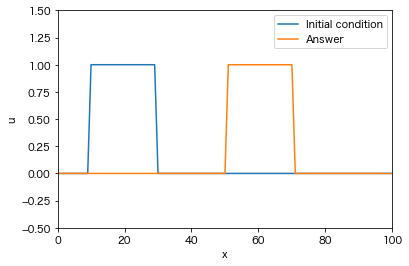

In [3]:
# Create square wave
Num_stencil_x = 101
x_array = np.arange(Num_stencil_x)
u_array = np.where((x_array >= 30) | (x_array < 10), 0.0, 1.0)
u_lower_boundary = 0.0
u_upper_boundary = 0.0
Time_step = 200
Delta_x = max(x_array) / (Num_stencil_x - 1)
C = 1
Delta_t = 0.2
CFL = C * Delta_t / Delta_x
total_movement = C * Delta_t * (Time_step + 1)
exact_u_array = np.where(((x_array >= 30 + total_movement) |  (x_array < 10 + total_movement)), 0.0, 1.0)
plt.plot(x_array, u_array, label="Initial condition")
plt.plot(x_array, exact_u_array, label="Answer")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u")
plt.xlim(0, max(x_array))
plt.ylim(-0.5, 1.5)

# FTCS(Forwad in time and Central difference in Space)

(-0.5, 1.5)

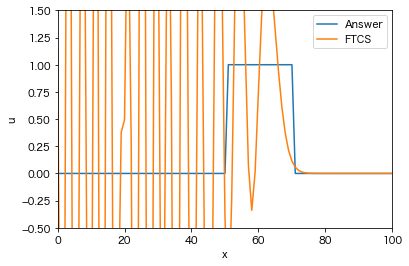

In [17]:
# Create square wave
Num_stencil_x = 101
x_array = np.arange(Num_stencil_x)
u_array = np.where((x_array >= 30) | (x_array < 10), 0.0, 1.0)
u_lower_boundary = 0.0
u_upper_boundary = 0.0
Time_step = 200
Delta_x = max(x_array) / (Num_stencil_x - 1)
C = 1
Delta_t = 0.2
CFL = C * Delta_t / Delta_x

u_ftcs = u_array.copy()
# タイムステップを設定
for n in range(Time_step):
    u_old = u_ftcs.copy()
    u_ftcs[0] = u_old[0] - CFL / 2 * (u_old[1] - u_lower_boundary)
    u_ftcs[-1] = u_old[-1] - CFL / 2 * (u_upper_boundary - u_old[-1])
    for j in range(1, Num_stencil_x - 1, 1):
        u_ftcs[j] = u_old[j] - CFL / 2 * (u_old[j + 1] - u_old[j - 1])
plt.plot(x_array, exact_u_array, label="Answer")
plt.plot(x_array, u_ftcs, label="FTCS")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u")
plt.xlim(0, max(x_array))
plt.ylim(-0.5, 1.5)

# 一次精度風上差分(Upwind differencing)

[0. 0. 0.]


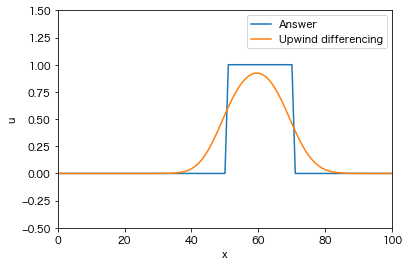

In [18]:
# Create square wave
Num_stencil_x = 101
x_array = np.arange(Num_stencil_x)
u_array = np.where((x_array >= 30) | (x_array < 10), 0.0, 1.0)
u_lower_boundary = 0.0
u_upper_boundary = 0.0
Time_step = 200
Delta_x = max(x_array) / (Num_stencil_x - 1)
C = 1
Delta_t = 0.2
CFL = C * Delta_t / Delta_x

u_upwind = u_array.copy()
# タイムステップを設定
for n in range(Time_step):
    u_old = u_upwind.copy()
    # u_upwind[0:1] = u_old[0] - CFL * (u_old[1] - u_lower_boundary)
    u_upwind[0] = u_old[0] - CFL * (u_old[1] - u_lower_boundary)
    for j in range(1, Num_stencil_x):
        # u_upwind[j : j + 1] = u_old[j] - CFL * (u_old[j] - u_old[j - 1])
        u_upwind[j] = u_old[j] - CFL * (u_old[j] - u_old[j - 1])

plt.plot(x_array, exact_u_array, label="Answer")
plt.plot(x_array, u_upwind, label="Upwind differencing")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u")
plt.xlim(0, max(x_array))
plt.ylim(-0.5, 1.5)

print(u_upwind[0:3])

# Lax_Wendroff scheme

(-0.5, 1.5)

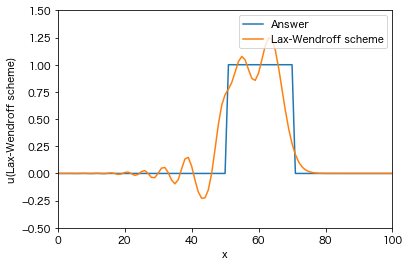

In [20]:
# Create square wave
Num_stencil_x = 101
x_array = np.arange(Num_stencil_x)
u_array = np.where((x_array >= 30) | (x_array < 10), 0.0, 1.0)
u_lower_boundary = 0.0
u_upper_boundary = 0.0
Time_step = 200
Delta_x = max(x_array) / (Num_stencil_x - 1)
C = 1
Delta_t = 0.2
CFL = C * Delta_t / Delta_x

u_lw= u_array.copy()
# タイムステップを設定
for n in range(Time_step):
    u_old = u_lw.copy()
    # u_lw[0:1] = u_old[0] - CFL / 2 * (u_old[1] - u_lower_boundary) \
                    # + CFL**2 / 2 * (u_old[1] - 2 * u_old[0] + u_lower_boundary)
    u_lw[1] = u_old[0] - CFL / 2 * (u_old[1] - u_lower_boundary) \
                    + CFL**2 / 2 * (u_old[1] - 2 * u_old[0] + u_lower_boundary)
    u_lw[-1] = u_old[-1] - CFL / 2 * (u_upper_boundary - u_old[-1]) \
                    + CFL**2 / 2 * (u_upper_boundary - 2 * u_old[-1] + u_old[-2])
    for j in range(1, Num_stencil_x-1, 1):
        u_lw[j] = u_old[j] - CFL / 2 * (u_old[j+1] - u_old[j-1]) \
                    + CFL**2 / 2 * (u_old[j+1] - 2 * u_old[j] + u_old[j-1])
plt.plot(x_array, exact_u_array, label="Answer")
plt.plot(x_array, u_lw, label="Lax-Wendroff scheme")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u(Lax-Wendroff scheme)")
plt.xlim(0, max(x_array))
plt.ylim(-0.5,1.5)

# CIP(Constrained Interpolation Profile scheme) method

(-0.5, 1.5)

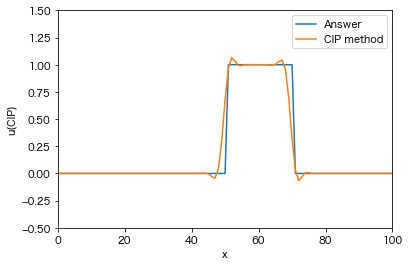

In [21]:
# Create square wave
Num_stencil_x = 101
x_array = np.arange(Num_stencil_x)
u_array = np.where((x_array >= 30) | (x_array < 10), 0.0, 1.0)
u_lower_boundary = 0.0
u_upper_boundary = 0.0
Time_step = 200
Delta_x = max(x_array) / (Num_stencil_x - 1)
C = 1
Delta_t = 0.2
CFL = C * Delta_t / Delta_x

u_cip= u_array.copy()
partial_u_cip = ((np.append(u_cip[1:], u_upper_boundary) + u_cip)/2 - (np.append(u_lower_boundary, u_cip[:-1]) + u_cip)/2)/ Delta_x
# 時間発展させる
for n in range(Time_step):
    u_old = u_cip.copy()
    partial_u_old = partial_u_cip.copy()
    u_cip[0] = 0
    partial_u_cip[0] = 0
    for j in range(1, Num_stencil_x):
        a = (partial_u_old[j] + partial_u_old[j-1]) / Delta_x**2 - 2.0 * (u_old[j] - u_old[j-1]) / Delta_x**3
        b = 3 * (u_old[j-1] - u_cip[j]) / Delta_x**2 + (2.0*partial_u_old[j] + partial_u_old[j-1]) / Delta_x
        c = partial_u_old[j]
        d = u_old[j]
        xi = - C * Delta_t  # C > 0
        # u_cip[j:j+1] = a * xi**3 + b * xi**2 + c * xi + d
        u_cip[j] = a * xi**3 + b * xi**2 + c * xi + d
        # partial_u_cip[j:j+1] = 3 * a * xi**2 + 2 * b * xi + c
        partial_u_cip[j] = 3 * a * xi**2 + 2 * b * xi + c
plt.plot(x_array, exact_u_array, label="Answer")
plt.plot(x_array, u_cip, label="CIP method")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("u(CIP)")
plt.xlim(0, max(x_array))
plt.ylim(-0.5,1.5)